In [9]:
# imports
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
# import utils
from tp_arbres_source import (rand_bi_gauss, rand_checkers,
                              rand_tri_gauss, rand_clown, frontiere)

## Question 1

We suggest to measure the impurity of the resulting set, after spliting according to a variable and given a threshold,
by measuring the dispersion of the target values withing each resulting set.

Hence, the more the data points of a set have centered values (target values) the more this set would be pure.

Putting this reasoning into equation, we define the measure of impirity of a given set as the following:

$$ H(R) = \frac{1}{|R|} \sum_{y \in \{target \ value \ of \ x \in R \}} (y - \bar{y})^2 $$

## Question 2

In [3]:
# sample data
data = rand_checkers(n1=114, n2=114, n3=114, n4=114)

# plot
fig = go.Figure(data=[
    go.Scatter(
        x=data[:, 0],
        y=data[:, 1],
        marker_color=data[:, 2],
        mode="markers"
    )
])

fig.update_layout(
    title="Data sampled from rand_checkers",
    xaxis_title="x",
    yaxis_title="y"
)

fig.show()

In [4]:
# plot of proportions of mistakes

# params
range_depth = np.arange(1, 25)
X, y = data[:, :2], data[:, -1]

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=.2,
    random_state=12365478
)

dict_error = {
    "gini": {"train": [], "test": [], "color": "#636EFA"},
    "entropy": {"train": [], "test": [], "color": "#EF553B"},
}

dict_data = {
    "train": {"X": X_train, "y": y_train},
    "test": {"X": X_test, "y": y_test}
}

for depth in range_depth:
    for impurity_measure in dict_error:
        # init / fit model
        classifier = DecisionTreeClassifier(
            criterion=impurity_measure,
            max_depth=depth,
            random_state=0
        )
        classifier.fit(X_train, y_train)

        for error_type, Xy in dict_data.items():
            y_true = Xy["y"]
            y_predicted = classifier.predict(Xy["X"])

            # compute / store error
            error = 1 - accuracy_score(y_true, y_predicted)
            dict_error[impurity_measure][error_type].append(error)

# plot
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Train", "Test"]
)

for i, error_type in enumerate(["train", "test"]):
    for impurity_measure in ["gini", "entropy"]:
        fig.add_trace(
            go.Scatter(
                x=range_depth,
                y=dict_error[impurity_measure][error_type],
                marker_color=dict_error[impurity_measure]["color"],
                name=impurity_measure,
                mode="lines+markers",
                showlegend=True if i == 0 else False
            ),
            row=1, col=i+1
        )

        fig.update_xaxes(
            title="max depth", 
            row=1, col=i+1
        )

        fig.update_yaxes(
            title="proportion of mistakes", 
            row=1, col=i+1
        )

fig.show()

- For training :
    - We observe that both **entropy** and **gini** impurity measures have similar evolution shape
    - They both decrease toward $0$ when ``max_depth`` increases
- For test:
    - They both have a minima which is reached at $7$ for gini and $10$ entropy 
    - they both attain a horizontal asymptot for a big ``max_depth`` which indicates an overfitting since the train error is still decrease in this region

## Question 3

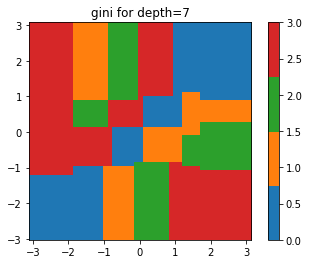

In [11]:
# plot of frontiere

# params
impurity_measure = "gini"
depth = 7

classifier = DecisionTreeClassifier(
    criterion=impurity_measure,
    max_depth=depth,
    random_state=0
)

classifier.fit(dict_data["train"]["X"], dict_data["train"]["y"])

plt.title(f"{impurity_measure} for depth={depth}")
frontiere(lambda x: classifier.predict(x), X)

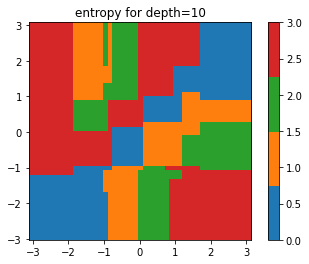

In [12]:
# params
impurity_measure = "entropy"
depth = 10

classifier = DecisionTreeClassifier(
    criterion=impurity_measure,
    max_depth=depth,
    random_state=0
)

classifier.fit(dict_data["train"]["X"], dict_data["train"]["y"])

plt.title(f"{impurity_measure} for depth={depth}")
frontiere(lambda x: classifier.predict(x), X)

## Question 4

In [13]:
# sample new data
data = rand_checkers(n1=40, n2=40, n3=40, n4=40)

X, y = data[:, :2], data[:, -1]

In [14]:
# plot of proportions of mistakes

# params
range_depth = np.arange(1, 25)
X, y = data[:, :2], data[:, -1]

# split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=.2,
    random_state=12365478
)

dict_error = {
    "gini": {"train": [], "test": [], "color": "#636EFA"},
    "entropy": {"train": [], "test": [], "color": "#EF553B"},
}

dict_data = {
    "train": {"X": X_train, "y": y_train},
    "test": {"X": X_test, "y": y_test}
}

for depth in range_depth:
    for impurity_measure in dict_error:
        # init / fit model
        classifier = DecisionTreeClassifier(
            criterion=impurity_measure,
            max_depth=depth,
            random_state=0
        )
        classifier.fit(X_train, y_train)

        for error_type, Xy in dict_data.items():
            y_true = Xy["y"]
            y_predicted = classifier.predict(Xy["X"])

            # compute / store error
            error = 1 - accuracy_score(y_true, y_predicted)
            dict_error[impurity_measure][error_type].append(error)

# plot
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=["Train", "Test"]
)

for i, error_type in enumerate(["train", "test"]):
    for impurity_measure in ["gini", "entropy"]:
        fig.add_trace(
            go.Scatter(
                x=range_depth,
                y=dict_error[impurity_measure][error_type],
                marker_color=dict_error[impurity_measure]["color"],
                name=impurity_measure,
                mode="lines+markers",
                showlegend=True if i == 0 else False
            ),
            row=1, col=i+1
        )

        fig.update_xaxes(
            title="max depth", 
            row=1, col=i+1
        )

        fig.update_yaxes(
            title="proportion of mistakes", 
            row=1, col=i+1
        )

fig.show()

- we derive same conclusion as the ones stated above in **question 2**